# Comparing wasm exported Datasets with Rust natives

In this notebook, we compare the performances of wasm exported and rust natives datasets.

The studied datasets are Sophia FastDataset, Sophia LightDataset, our own FullDataset (a data structure that uses HashMap of every possible key parts to the whole dataset) and our own TreeDataset (a data structure that can index every possible quad order, and store them using trees)

## Loading data

In [1]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
dataset_types = [("Fast", ""), ("Full", "_full"), ("Tree", "_tree"), ("Light", "_lg")]
prefixes = "matchforeach/fillforeach_"
queries = ["query", "query3", "query2", "query4"]
extension = ".csv"

def query_test(query):
    if query == "query" or query == "query1":
        return "<POG>"
    elif query == "query2":
        return "<SG>"
    elif query == "query3":
        return "<PO>"
    else:
        return "<S>"

In [3]:
import csv

## Compute average

In [4]:
data = {}

for target in [("Rust", ""), ("Wasm", "_js")]:
    for query in queries:
        for dataset_type in dataset_types:
            filename = prefixes + query + "-sophia" + target[1] + dataset_type[1] + extension

            with open(filename, 'r') as file:
                reader = csv.reader(file)
                is_first = True
                for row in reader:
                    if is_first:
                        is_first = False
                    else:
                        total_time = float(row[7]) + float(row[8])
                        key = (query, dataset_type[0], int(row[1]), target[0])
                        
                        if key not in data:
                            data[key] = []
                        
                        data[key].append(total_time)

                 
def avg(l):
    i = 0
    for x in l:
        i += x
    return i / len(l)
    
    
for key in data:
    data[key] = avg(data[key])

In [5]:
def draw_plot(query_name, graph_name):
    for target in ['Rust', 'Wasm']:
        x = []
        y = []
        
        for entry in data:
            if entry[0] == query_name and entry[1] == graph_name and entry[3] == target:
                x.append(entry[2])
                y.append(data[entry])
                
        qname = query_name
        if qname == "query":
            qname = "query1"
        
        plt.title("Comparing " + graph_name + " Dataset on " + qname)
        
        plt.loglog(x, y)
        
    plt.show()

## Plot drawing

We draw a plot for every dataset and query to compare the plot shape

- x = number of quads in the dataset
- y = time to answer in second

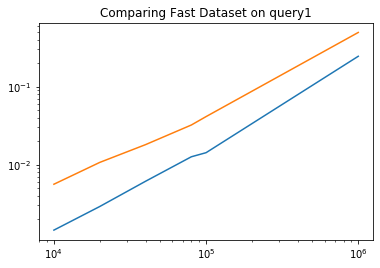

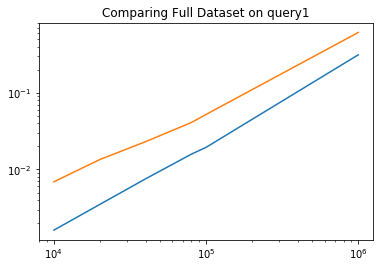

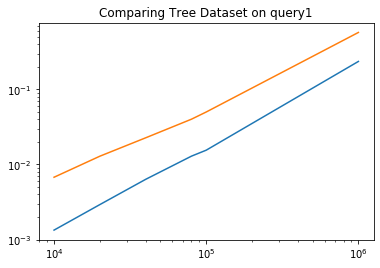

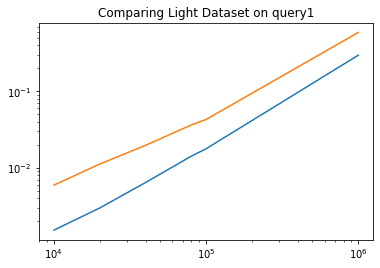

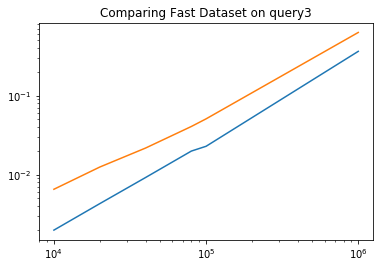

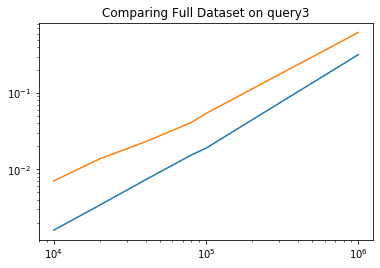

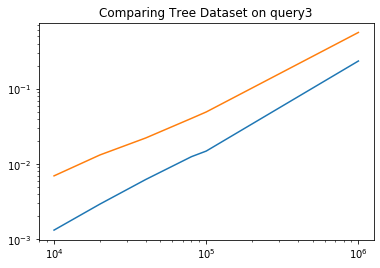

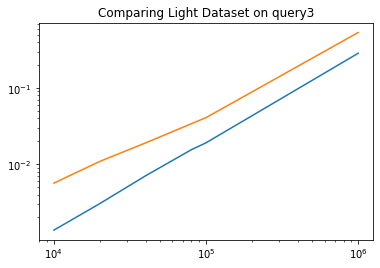

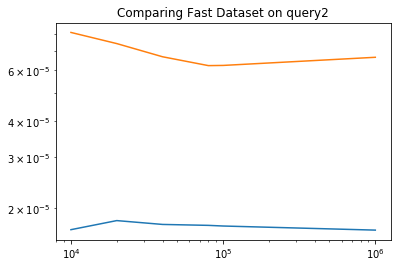

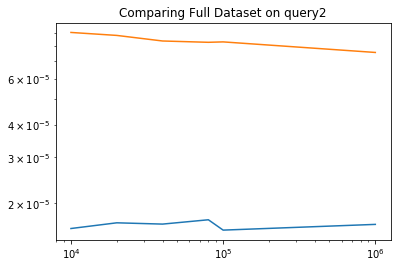

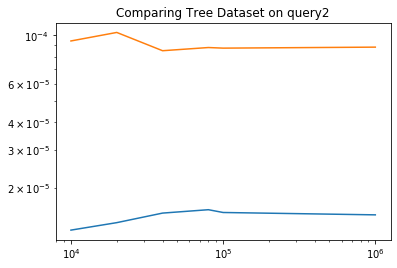

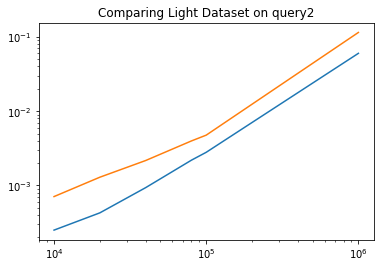

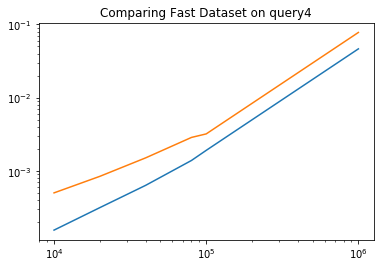

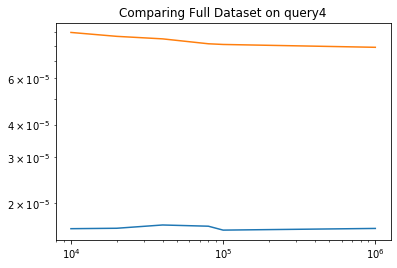

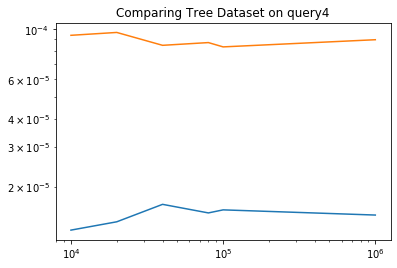

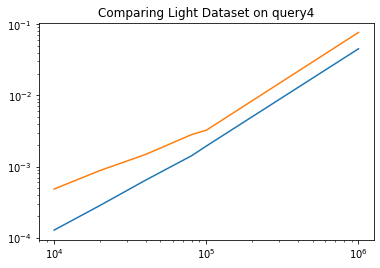

In [6]:
for query in queries:
    for dataset_type in dataset_types:
        draw_plot(query, dataset_type[0])

For the same query and datastructure, native Rust and Wasm exported datasets have the same plot, ie the same complexity.

## Comparing different datasets

A new draw plot function

In [9]:
def draw_plot(queries, datasets, targets):
    for query in queries:
        for target in targets:
            for dataset in datasets:
                x = []
                y = []
        
                for entry in data:
                    if entry[0] == query and entry[1] == dataset and target == entry[3]:
                        x.append(entry[2])
                        y.append(data[entry])
                
                plt.loglog(x, y)
        
    # plt.title("Comparing " + graph_name + " Dataset on " + qname)
                
    plt.show()

## Exploring queries

### Query 1 : POG

Every dataset behave the same.

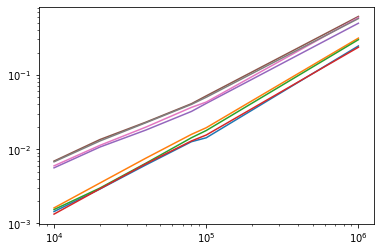

In [18]:
draw_plot(["query"], ["Fast", "Full", "Light", "Tree"], ["Rust", "Wasm"])

### Query 4 : S only

Fast and Light are slow because they don't have any efficient index : they have to loop of the whole dataset.

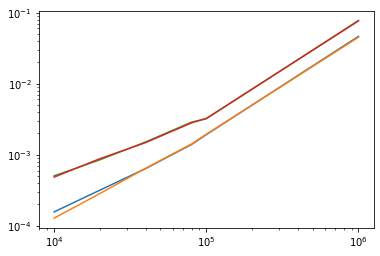

In [20]:
draw_plot(["query4"], ["Fast", "Light"], ["Rust", "Wasm"])

After the first execution, Tree and Full have the right index and can find in constant time the result

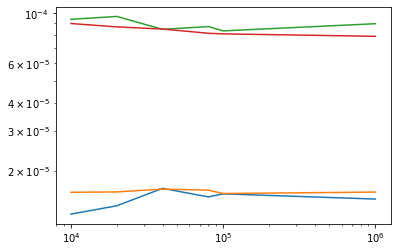

In [21]:
draw_plot(["query4"], ["Tree", "Full"], ["Rust", "Wasm"])

## Query 2 (SG)

--- query 2 on datasets ---
Light : an inneficient solution


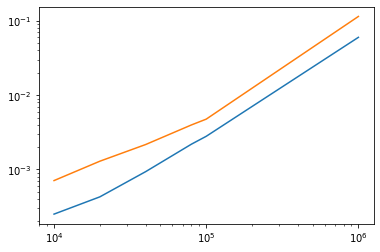

Fast, Tree and Full :


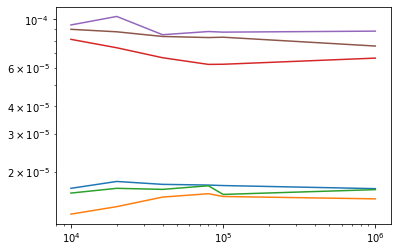

Rust (bottom part of the previous graph)


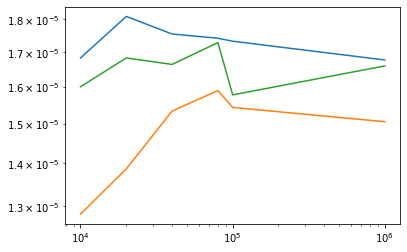

Wasm (top part of the previous of the previous graph)


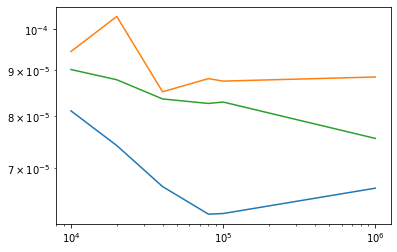

In [31]:
print("--- query 2 on datasets ---")
print("Light : an inneficient solution")
draw_plot(["query2"], ["Light"], ["Rust", "Wasm"])
print("Fast, Tree and Full :")
draw_plot(["query2"], ["Fast", "Tree", "Full"], ["Rust", "Wasm"])
print("Rust (bottom part of the previous graph)")
draw_plot(["query2"], ["Fast", "Tree", "Full"], ["Rust"])
print("Wasm (top part of the previous of the previous graph)")
draw_plot(["query2"], ["Fast", "Tree", "Full"], ["Wasm"])

### Fast vs Tree

Blue = Fast ; Orange = Tree
<POG> in Rust


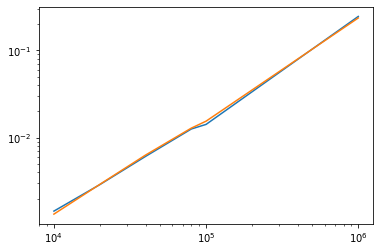

<POG> in Wasm


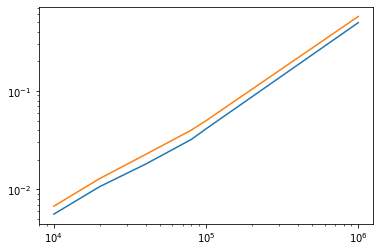

<PO> in Rust


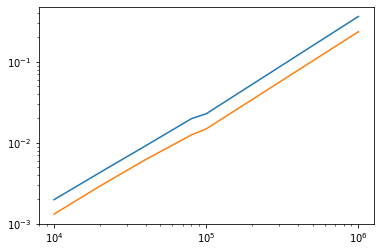

<PO> in Wasm


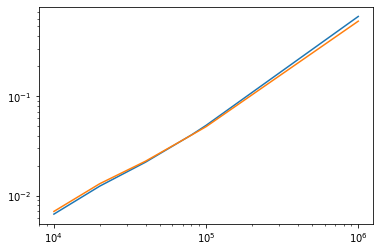

<SG> in Rust


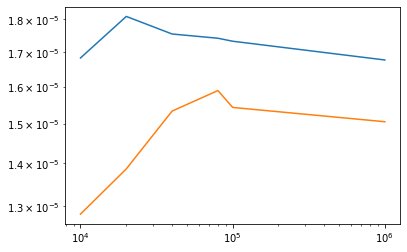

<SG> in Wasm


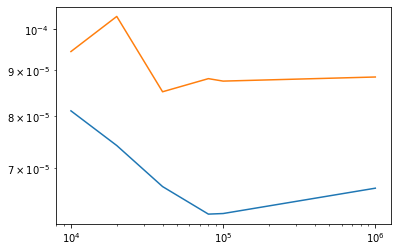

<S> in Rust


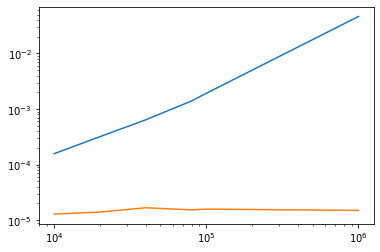

<S> in Wasm


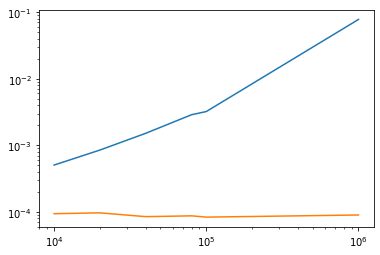

In [42]:
print("Blue = Fast ; Orange = Tree")

for query in queries:
    for target in ["Rust", "Wasm"]:
        print(query_test(query) + " in " + target)
        draw_plot([query], ["Fast", "Tree"], [target])